In [1]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import visual.plot as vplot
from model.seirmodel import SEIRModel

In [2]:
df = pd.read_csv("data/covid/france/evolution_par_jour_18_06.csv", sep=",")
df.tail()

,Unnamed: 0,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,...,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
136,136,2020-06-13,pays,FRA,France,156813.0,NaN,37599.0,NaN,19014.0,...,10909.0,68.0,14.0,72808.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66751365.0
137,137,2020-06-14,pays,FRA,France,157220.0,NaN,37599.0,NaN,19023.0,...,10881.0,33.0,6.0,72859.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66750898.0
138,138,2020-06-15,pays,FRA,France,157372.0,NaN,37599.0,NaN,19052.0,...,10752.0,114.0,12.0,73044.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66750532.0
139,139,2020-06-16,pays,FRA,France,157716.0,NaN,37901.0,NaN,19090.0,...,10535.0,143.0,14.0,73335.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66749859.0
140,140,2020-06-17,pays,FRA,France,158174.0,NaN,37901.0,NaN,19118.0,...,10267.0,116.0,14.0,73667.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66749041.0


In [3]:
f = lambda x, param : param*x**2 # la fonction
param_x = 0 # le paramètre à trouver
xrange = list(range(10)) # le nombre de valeurs tests
mesdonnees = [f(i, 2) for i in xrange] # les valeurs tests

In [4]:
params, covariance = scipy.optimize.curve_fit(f, xrange, mesdonnees) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [2.], covariances = [[0.]]


In [5]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

### Test curve fit sur les données covid (SEIR)

In [6]:
seir = SEIRModel(N=67000000, I0=df.loc[0, "cas_confirmes"], delta_init=14)

t = range(df.shape[0])
seir.fit(t, df["cas_confirmes"])

d:\dev\projects\projet_sdd\venv\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
D:\dev\projects\projet_sdd\model\seirmodel.py:80: RuntimeWarning: overflow encountered in double_scalars
  dIdt = delta * E - gamma * I
D:\dev\projects\projet_sdd\model\seirmodel.py:81: RuntimeWarning: overflow encountered in double_scalars
  dRdt = gamma * I


[  1.31620039   1.20903215 113.93307258]


In [7]:
# Integrate the SEIR equations over the time grid, t.
t = range(180)
S, E, I, R = seir.predict(t)

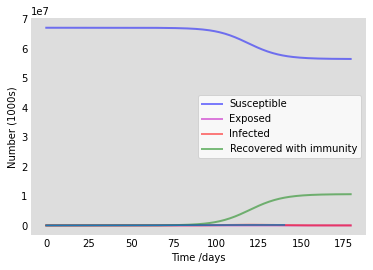

In [8]:
vplot.plot_SEIR(S, E, I, R, t)
df["cas_confirmes"].plot()

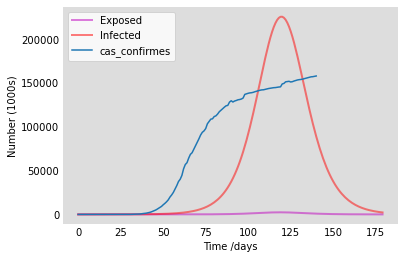

In [9]:
vplot.plot_SEIR(S=None, E=E, I=I, R=None, t=t) # only I
df["cas_confirmes"].plot()
plt.legend()

### Test avant confinement

In [10]:
df = df[df["date"] < "2020-04-01"]

In [11]:
seir_ac = SEIRModel(N=67000000, I0=df.loc[0, "cas_confirmes"], delta_init=14)

t = range(df.shape[0])
seir_ac.fit(t, df["cas_confirmes"])

d:\dev\projects\projet_sdd\venv\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[1.10046215 0.90268773 4.91066849]


In [12]:
# Integrate the SEIR equations over the time grid, t.
t = range(180)
S, E, I, R = seir_ac.predict(t)

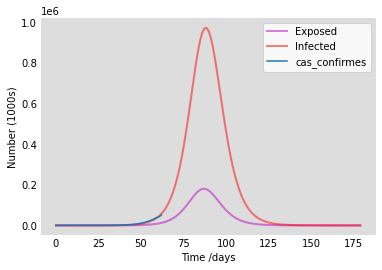

In [13]:
vplot.plot_SEIR(S=None, E=E, I=I, R=None, t=t) # only I
df["cas_confirmes"].plot()
plt.legend()